Analysing the sales of walmart (eg - analysing weekly sales, which store or department sells the most)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv('train.csv')
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
test_df=pd.read_csv('test.csv')
features_df=pd.read_csv('features.csv')
stores_df=pd.read_csv('stores.csv')

In [4]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
stores_df.shape

(45, 3)

In [11]:
features_df.shape

(8190, 12)

In [12]:
train_df.shape

(421570, 5)

In [13]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [14]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [15]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
dataset = features_df.merge(stores_df,how='inner',on='Store')
dataset

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [18]:
import datetime
dataset['Date']=pd.to_datetime(dataset['Date'])

In [19]:
train_df['Date']=pd.to_datetime(train_df['Date'])

In [20]:
final_df=train_df.merge(dataset,how='inner',on=['Store','Date','IsHoliday'])

In [21]:
final_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [22]:
final_df['Date'].dt.week
final_df['Date'].dt.year

C:\Users\sanka\AppData\Local\Temp\ipykernel_25180\3886627937.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  final_df['Date'].dt.week


0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
421565    2012
421566    2012
421567    2012
421568    2012
421569    2012
Name: Date, Length: 421570, dtype: int64

In [23]:
final_df['week'] = final_df['Date'].dt.week
final_df['year'] = final_df['Date'].dt.year

C:\Users\sanka\AppData\Local\Temp\ipykernel_25180\4054666164.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  final_df['week'] = final_df['Date'].dt.week


In [24]:
final_df['Date'].dt.isocalendar().week

0          5
1          5
2          5
3          5
4          5
          ..
421565    43
421566    43
421567    43
421568    43
421569    43
Name: week, Length: 421570, dtype: UInt32

In [25]:
def scatter(df,col):
    plt.figure(figsize=(12,8))
    plt.scatter(x=df['Weekly_Sales'],y=df[col])
    plt.title("Weekly_Sales vs " + str(col))
    plt.xlabel("Weekly_Sales")
    plt.ylabel(col)

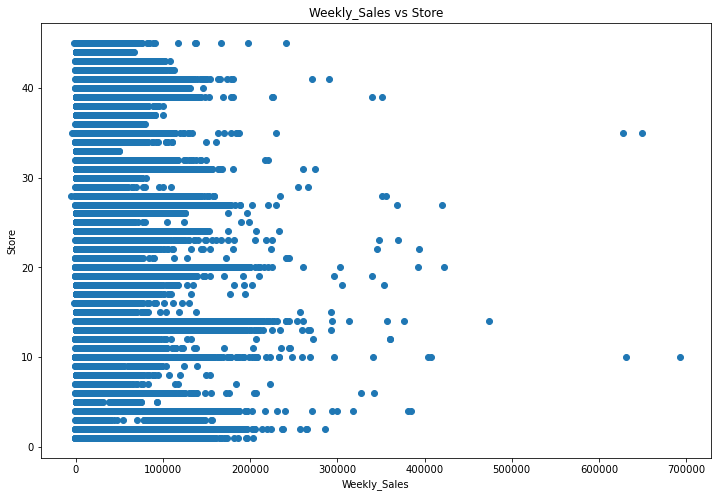

In [26]:
scatter(final_df,'Store')

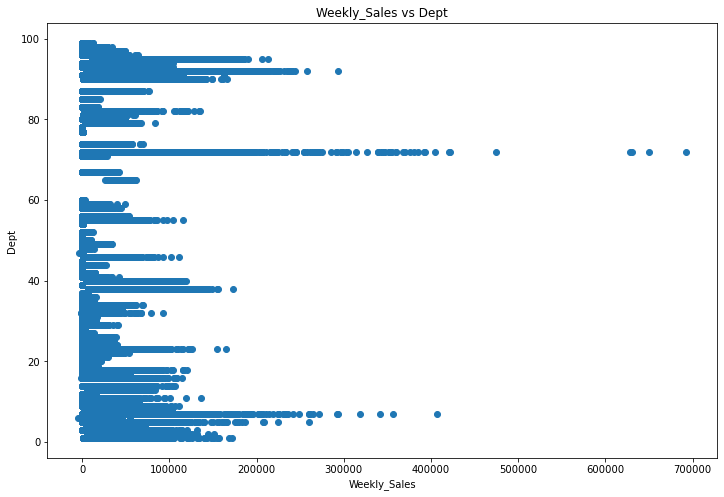

In [27]:
scatter(final_df,'Dept')

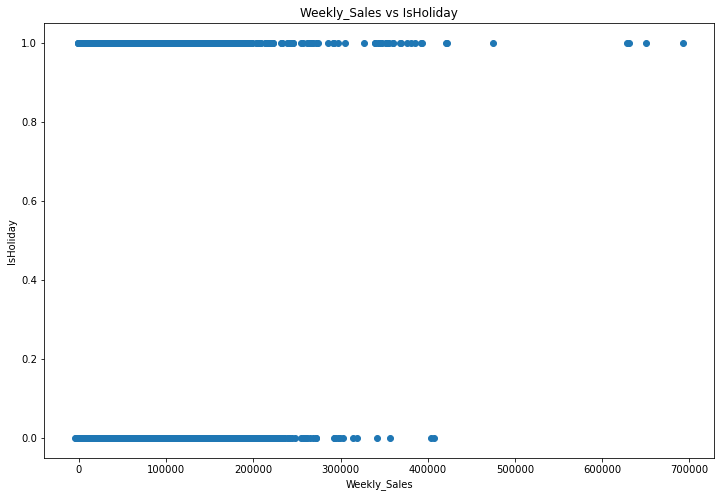

In [28]:
scatter(final_df,'IsHoliday')

In [29]:
final_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012


In [30]:
# Average sale weekly in 2011
weekly_sales_2011 = final_df[final_df['year'] == 2011].groupby(['week'])['Weekly_Sales'].mean()

In [31]:
weekly_sales_2012 = final_df[final_df['year'] == 2012].groupby(['week'])['Weekly_Sales'].mean()

In [32]:
weekly_sales_2010 = final_df[final_df['year'] == 2010].groupby(['week'])['Weekly_Sales'].mean()
weekly_sales_2010

week
5     16836.121997
6     16352.056032
7     16216.658979
8     14899.549688
9     15921.015727
10    15546.850545
11    15286.773578
12    14975.894486
13    17098.620298
14    16050.589780
15    15347.713003
16    15252.114749
17    14967.509147
18    16542.716071
19    15513.374470
20    15499.865359
21    16428.449453
22    17246.922034
23    16440.889213
24    16281.041446
25    15978.414909
26    16769.792424
27    16500.010117
28    15940.675484
29    15357.115672
30    15300.090305
31    16576.684704
32    16044.343374
33    16222.320896
34    15841.870407
35    16129.274645
36    15537.758883
37    14708.339539
38    14105.905324
39    14391.780535
40    15362.048443
41    14726.782747
42    14678.483136
43    14871.361170
44    15625.249792
45    15753.005748
46    15475.166043
47    22403.336705
48    16924.051502
49    18882.893619
50    20892.463619
51    27378.692693
52    13738.538566
Name: Weekly_Sales, dtype: float64

In [33]:
weekly_sales_2010.values

array([16836.12199662, 16352.0560318 , 16216.65897884, 14899.54968824,
       15921.0157269 , 15546.85054502, 15286.77357798, 14975.89448592,
       17098.62029841, 16050.58977974, 15347.71300272, 15252.1147494 ,
       14967.50914726, 16542.71607094, 15513.37446954, 15499.86535898,
       16428.44945304, 17246.92203436, 16440.88921279, 16281.04144615,
       15978.41490915, 16769.79242372, 16500.01011712, 15940.67548432,
       15357.11567225, 15300.09030511, 16576.68470426, 16044.34337362,
       16222.32089624, 15841.87040718, 16129.27464457, 15537.75888321,
       14708.33953909, 14105.90532401, 14391.78053492, 15362.04844346,
       14726.78274744, 14678.48313565, 14871.36116985, 15625.24979181,
       15753.00574795, 15475.16604252, 22403.33670524, 16924.0515022 ,
       18882.8936194 , 20892.46361947, 27378.69269283, 13738.53856609])

C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

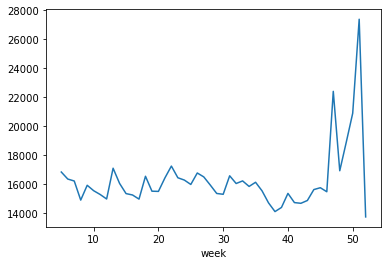

In [34]:
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)

C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

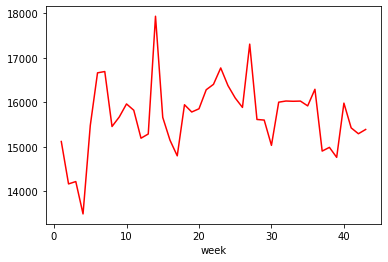

In [35]:
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='red')

C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


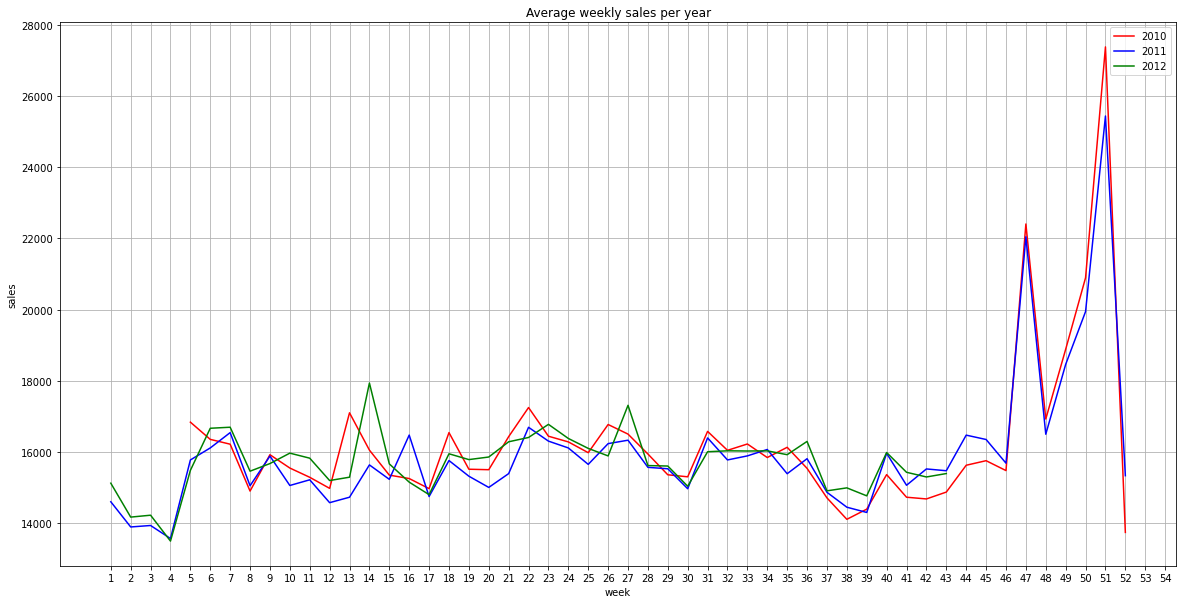

In [36]:
plt.figure(figsize = (20,10))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='red')
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='blue')
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='green')
plt.xticks(np.arange(1,55,step=1))
plt.grid()
plt.title('Average weekly sales per year')
plt.xlabel('week')
plt.ylabel('sales')
plt.legend(['2010','2011','2012'])

C:\Users\sanka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

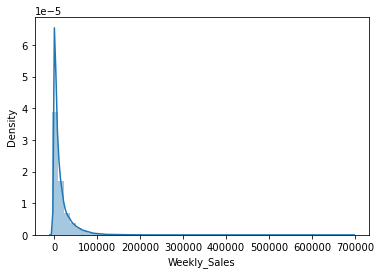

In [37]:
sns.distplot(final_df['Weekly_Sales'])

<AxesSubplot:xlabel='Type', ylabel='Size'>

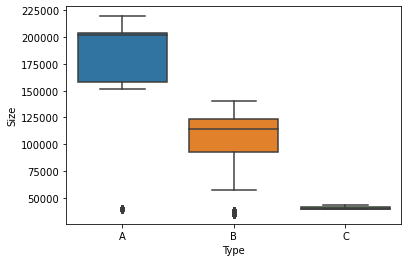

In [38]:
# Relationship between store type and store size using boxplot
sns.boxplot(x='Type',y='Size',data=final_df)

In [39]:
# Store with highest weekly average sales
weekly_stores_sales=final_df['Weekly_Sales'].groupby(final_df['Store']).mean()

In [40]:
weekly_stores_sales

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

In [41]:
weekly_store_sales_df=pd.DataFrame(weekly_stores_sales)

In [42]:
weekly_store_sales_df

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [43]:
weekly_store_sales_df.sort_values('Weekly_Sales',ascending=False).style.bar(color='pink')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [44]:
final_df[final_df['Store']==20]['Type'].unique()

array(['A'], dtype=object)

In [45]:
final_df[final_df['Store']==5]['Type'].unique()

array(['B'], dtype=object)

C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales per store')

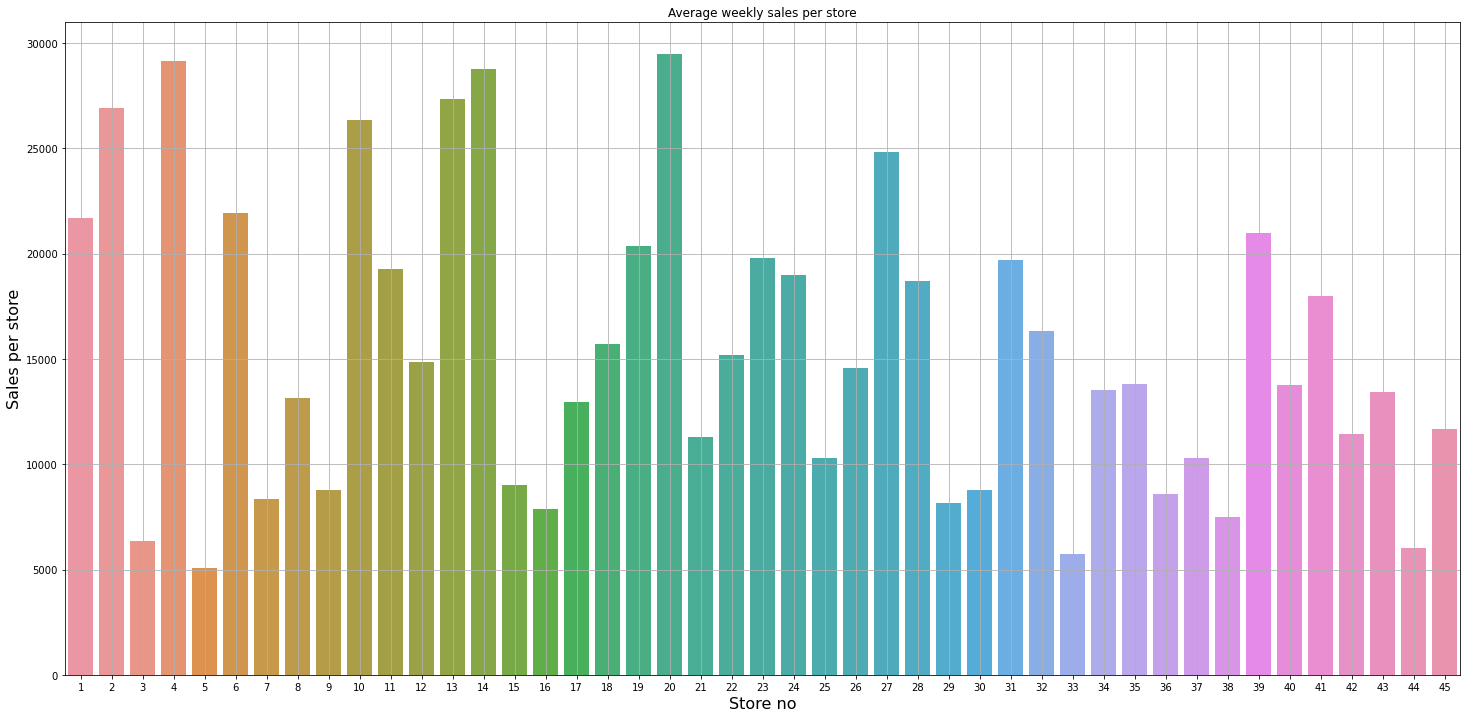

In [46]:
plt.figure(figsize=(25,12))
sns.barplot(weekly_stores_sales.index,weekly_stores_sales.values)
plt.grid()
plt.title('Average weekly sales per store')
plt.xlabel('Store no',fontsize=16)
plt.ylabel('Sales per store',fontsize=16)

In [47]:
weekly_sales_dept= final_df.groupby(['Dept'])['Weekly_Sales'].mean()

In [48]:
weekly_sales_dept

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: Weekly_Sales, Length: 81, dtype: float64

In [49]:
weekly_sales_dept_df=pd.DataFrame(weekly_sales_dept)

In [50]:
weekly_sales_dept_df

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [51]:
weekly_sales_dept_df.sort_values('Weekly_Sales',ascending=False).style.bar(color='yellow')

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


C:\Users\sanka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales per Department')

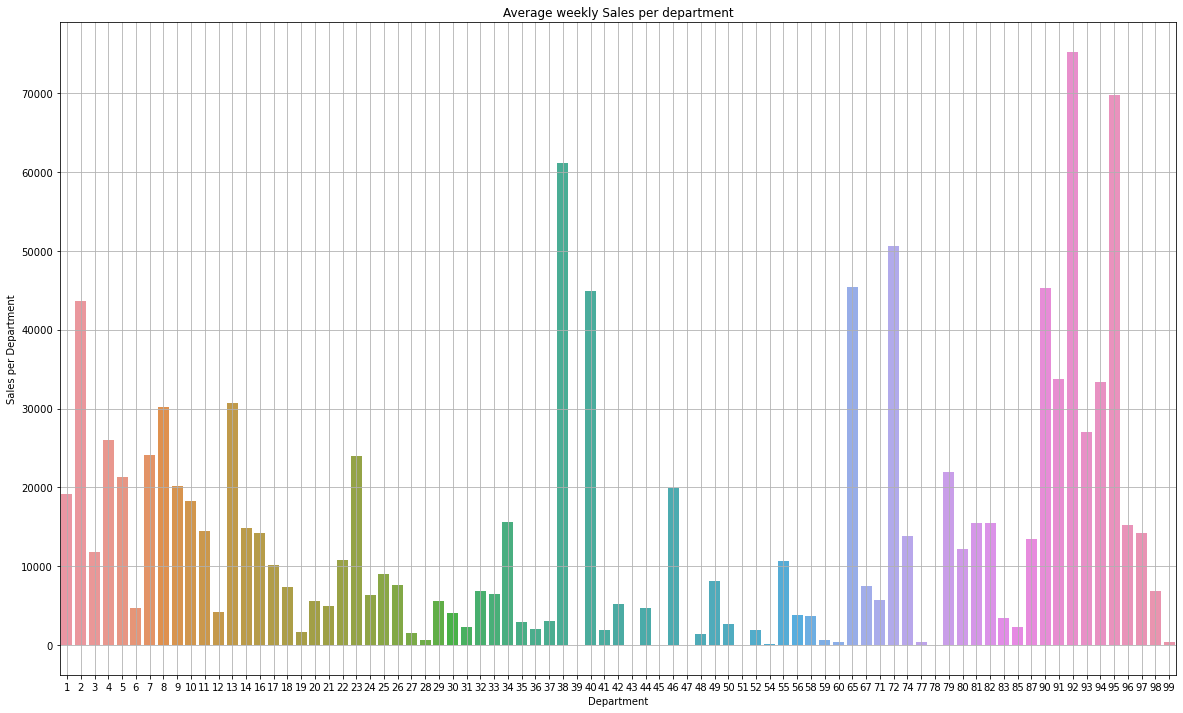

In [52]:
plt.figure(figsize=(20,12))
sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values)
plt.grid()
plt.title('Average weekly Sales per department')
plt.xlabel('Department')
plt.ylabel('Sales per Department')

<AxesSubplot:>

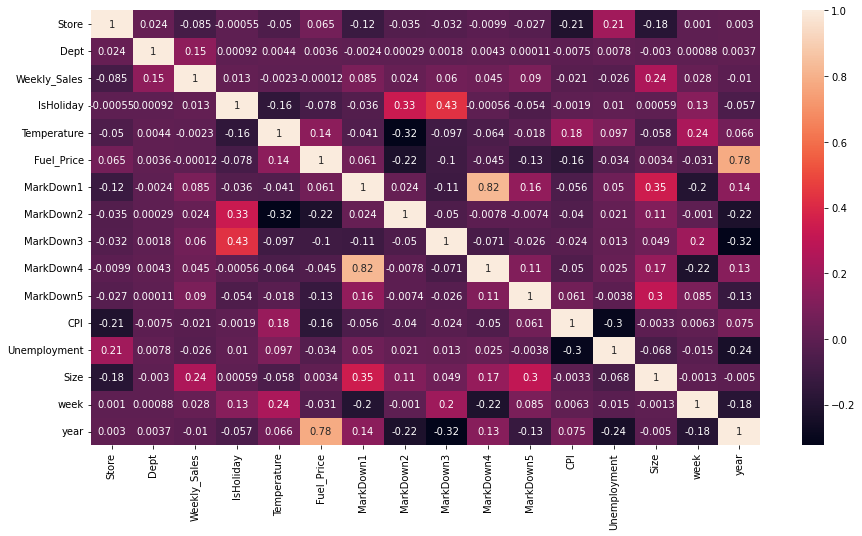

In [53]:
#correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(final_df.corr(),annot=True)

In [54]:
# 1. Dept 92 having highest sales
# 2. Store 20 having highest sales
# 3. Store 5 has lowest sales
# 4. Dept 43 have lowest sales
# 5. All years display same pattern and we can clearly see higher sales in the end weeks of the year
# 6. We can see higher sales when IsHoliday is true
# 7. Type A store have the larger size whereas type B has smaller size
# 8. Store 20 with highest sales belongs to type A whereas store 5 have lowest sales belongs to type C
# 9. Higher correlation between fuel prices and year